In [2]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_numerics
import ariel_gp
import ariel_load
import time
import numpy as np
import multiprocess
import importlib
import copy
import cupy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm
importlib.reload(ariel_load)

local


<module 'ariel_load' from '/mnt/d/ariel2/code/core/ariel_load.py'>

In [3]:
train_data = kgs.load_all_train_data()
kgs.debugging_mode = 2

In [7]:
importlib.reload(ariel_load)
loader_list = []
names = []

hole_poke = False

loaders = ariel_load.default_loaders()
loaders[0].cache_steps = [4]
loader_list.append(copy.deepcopy(loaders))
names.append('Baseline')

# for ii in range(2):
#     loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False   
# loader_list.append(copy.deepcopy(loaders))
# names.append('Baseline with bad rows')

loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
loaders[1].apply_pixel_corrections.mask_hot = False
loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
loaders[1].apply_wavelength_binning.residual_threshold = 100
loader_list.append(copy.deepcopy(loaders))
names.append('New AIRS')

loaders[1].apply_wavelength_binning.use_rr = True
loader_list.append(copy.deepcopy(loaders))
names.append('New AIRS rr')


# loaders[1].apply_pixel_corrections.mask_hot = True
# loader_list.append(copy.deepcopy(loaders))
# names.append('New AIRS mask hot')


#loader_list.append(copy.deepcopy(loaders))
#names.append('New AIRS threshold 30 no mask hot')

# for ii in range(2):
#     loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#     loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# loaders[0].apply_wavelength_binning.options.n_components = 4
# loaders[1].apply_wavelength_binning.options.n_components = 3
# loader_list.append(copy.deepcopy(loaders))
# names.append('New with inpainting')

# for ii in range(2):
#     loaders[ii].apply_full_sensor_corrections.inpainting_2d = False
#     loaders[ii].apply_full_sensor_corrections.inpainting_wavelength = False
# loader_list.append(copy.deepcopy(loaders))
# names.append('New w/o inpainting')

# loaders[1].apply_wavelength_binning.options.n_components = 1
# loader_list.append(copy.deepcopy(loaders))
# names.append('New w/o inpainting 1 comp')

model = ariel_gp.PredictionModel()
model.plot_final = True
model.train(train_data)

In [12]:
kgs.profiling=False
dats = []
for ii,d in enumerate(train_data[2:3]):
    print(ii)
    d=copy.deepcopy(d)    
    for j,load in enumerate(loader_list):
        d.load_to_step(0,load)
        d.load_to_step(5,load)
        
        airs_sig = d.transits[0].data[1].data
        for ii in range(airs_sig.shape[1]):
            airs_sig[:,ii]/=kgs.rms(airs_sig[:,ii])
        dats.append(airs_sig)
        
        d.load_to_step(0,load)

0
229 124.19220252990789 14 False
229 124.19220252990789 14 False


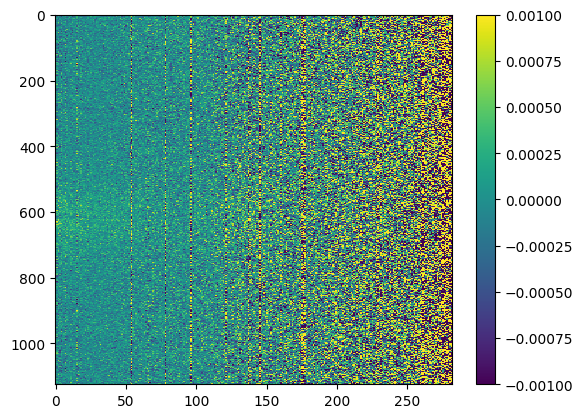

In [38]:
plt.figure()
alpha=1
plt.imshow(-(dats[0]-(alpha*dats[1]+(1-alpha)*dats[2])).get(), aspect='auto', interpolation='none')
plt.clim([-1e-3,1e-3])
plt.colorbar()

In [6]:
R.shape

NameError: name 'R' is not defined